# Loan Default Prediction Using Deep Learning on Lending Club Data

This project focuses on developing a deep learning model to predict the likelihood of loan default using Lending Club’s historical loan data from 2007 to 2015. Accurate default prediction is crucial for financial institutions like Lending Club to minimize risk and ensure profitability.

The project involves comprehensive data preprocessing and the implementation of a deep learning solution to identify patterns that indicate potential loan defaults, thereby aiding in better decision-making for future loan approvals.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load and Understand the Data

In [14]:
df = pd.read_csv('/content/loan_data (2).csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Data Preprocessing

#### Handle Categorical Variables

In [15]:
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

#### Check for Missing Values

In [16]:
df.isnull().sum()

,0
credit.policy,0
int.rate,0
installment,0
log.annual.inc,0
dti,0
fico,0
days.with.cr.line,0
revol.bal,0
revol.util,0
inq.last.6mths,0


In [ ]:
#df.dropna(inplace=True) #drop null if found

### Exploratory Data Analysis (EDA)

#### Class Distribution

<Axes: xlabel='credit.policy', ylabel='count'>

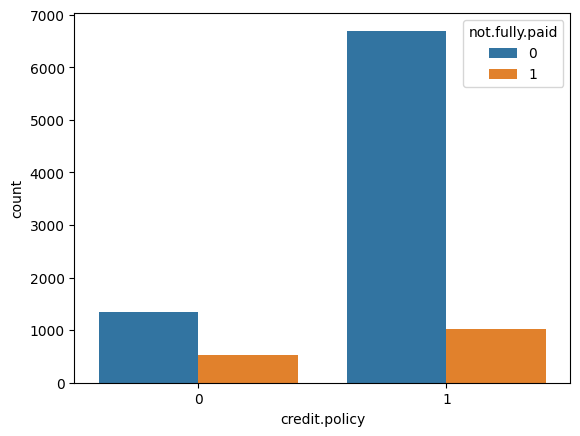

In [17]:
sns.countplot(data=df, x='credit.policy', hue='not.fully.paid')

#### FICO Score Distribution

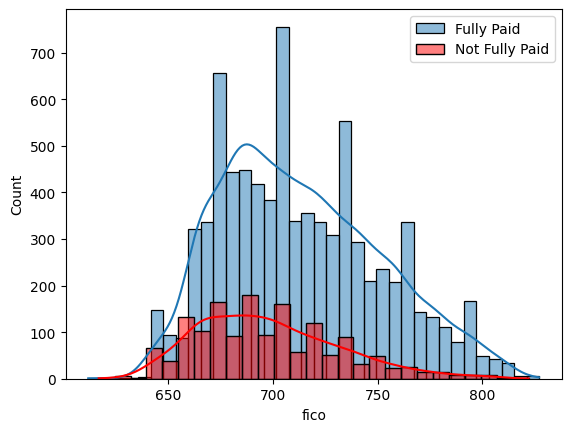

In [18]:
sns.histplot(df[df['not.fully.paid']==0]['fico'], label='Fully Paid', kde=True)
sns.histplot(df[df['not.fully.paid']==1]['fico'], label='Not Fully Paid', kde=True, color='red')
plt.legend()

#### Correlation Heatmap

<Axes: >

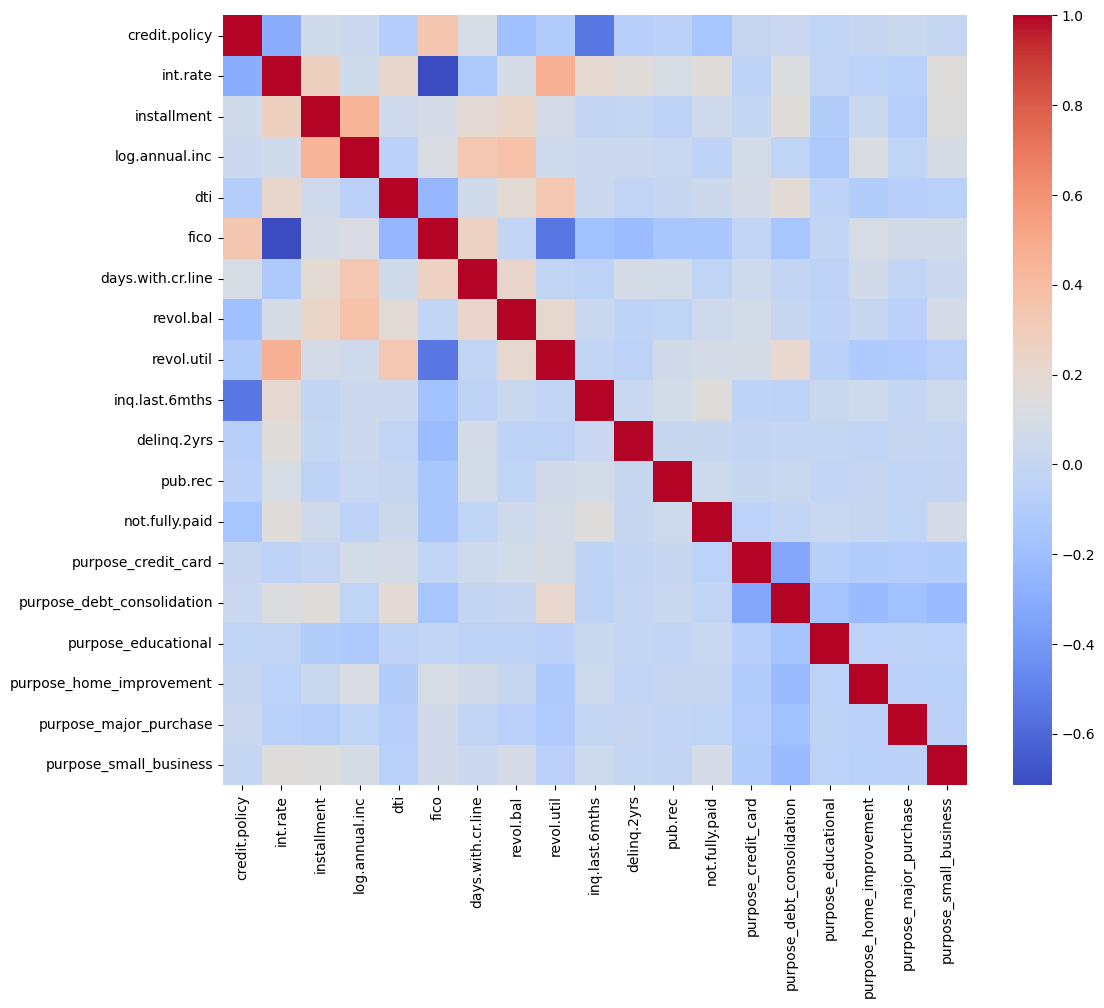

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)

### Feature Engineering

In [20]:
df.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [28]:
# Correlation Filtering
threshold = 0.90
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
df.drop(columns=to_drop, inplace=True)

In [29]:
#Train-Test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

In [31]:
X.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,True,False,False,False,False,False


In [32]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

### Build Deep Learning Model

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7962 - loss: 0.5105 - val_accuracy: 0.8398 - val_loss: 0.4179
Epoch 2/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8332 - loss: 0.4421 - val_accuracy: 0.8398 - val_loss: 0.4134
Epoch 3/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8469 - loss: 0.4166 - val_accuracy: 0.8398 - val_loss: 0.4124
Epoch 4/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8405 - loss: 0.4229 - val_accuracy: 0.8392 - val_loss: 0.4109
Epoch 5/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8378 - loss: 0.4317 - val_accuracy: 0.8392 - val_loss: 0.4098
Epoch 6/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8417 - loss: 0.4174 - val_accuracy: 0.8387 - val_loss: 0.4104
Epoch 7/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8453 - loss: 0.4111 - val_accuracy: 0.8398 - val_loss: 0.4114
Epoch 8/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8410 - loss: 0.4200 - val_accuracy: 0.8398 - val_

### Evaluation

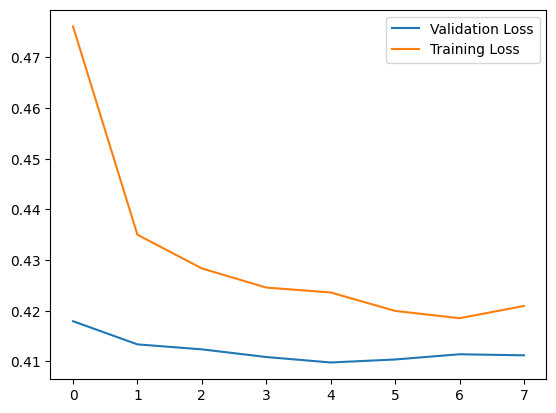

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[1609    0]
 [ 307    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1609
           1       0.00      0.00      0.00       307

    accuracy                           0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.71      0.84      0.77      1916



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
# Plot training history
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.legend()
plt.show()

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix

preds = model.predict(X_test)
y_pred = (preds > 0.5).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Submission

In [35]:
output = pd.read_csv("/content/output.csv")
output.head()

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [36]:
test_df = pd.read_csv("/content/input.csv")
test_df.head()

,1,0.1189,829.1,11.35040654,19.48,737,5639.958333,28854,52.1,0,0.1,0.2,0.3,0.4,1.1,0.5,0.6,0.7
0,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0
1,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0
2,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0
3,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0
4,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,1,0,0,0,0


In [37]:
test_df_processed = pd.get_dummies(test_df)
test_df_processed = test_df_processed.reindex(columns=X.columns, fill_value=0)

In [38]:
X_test_final = scaler.transform(test_df_processed)

In [39]:
predictions = model.predict(X_test_final)
predicted_classes = (predictions > 0.5).astype(int).flatten()

300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [42]:
submission = pd.DataFrame({
    'not.fully.paid': predicted_classes
})
submission.head()

,not.fully.paid
0,0
1,0
2,0
3,0
4,0


In [43]:
submission.to_csv('submission.csv')